## Day 32 Lecture 1 Assignment

In this assignment, we will learn about K nearest neighbor regression. We will use the absenteeism at work dataset loaded below and analyze the model generated for this dataset.

The meaning of the different columns can be found here: https://www.kaggle.com/tonypriyanka2913/employee-absenteeism

In [1]:
%matplotlib inline

import math

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
absent = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/Absenteeism_at_work.csv', sep=';')

In [3]:
absent.shape

(740, 21)

In [4]:
absent.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,2


Find which variables have the highest pairwise correlation and remove them from our dataset. Additionally, try to think of which variables are correlated by looking at the column names and remove those columns as well.

Note: When choosing between two categorical variables that are correlated, you often want to keep the one with fewer unique values. Why might that be? (Think about the cons of KNN.)

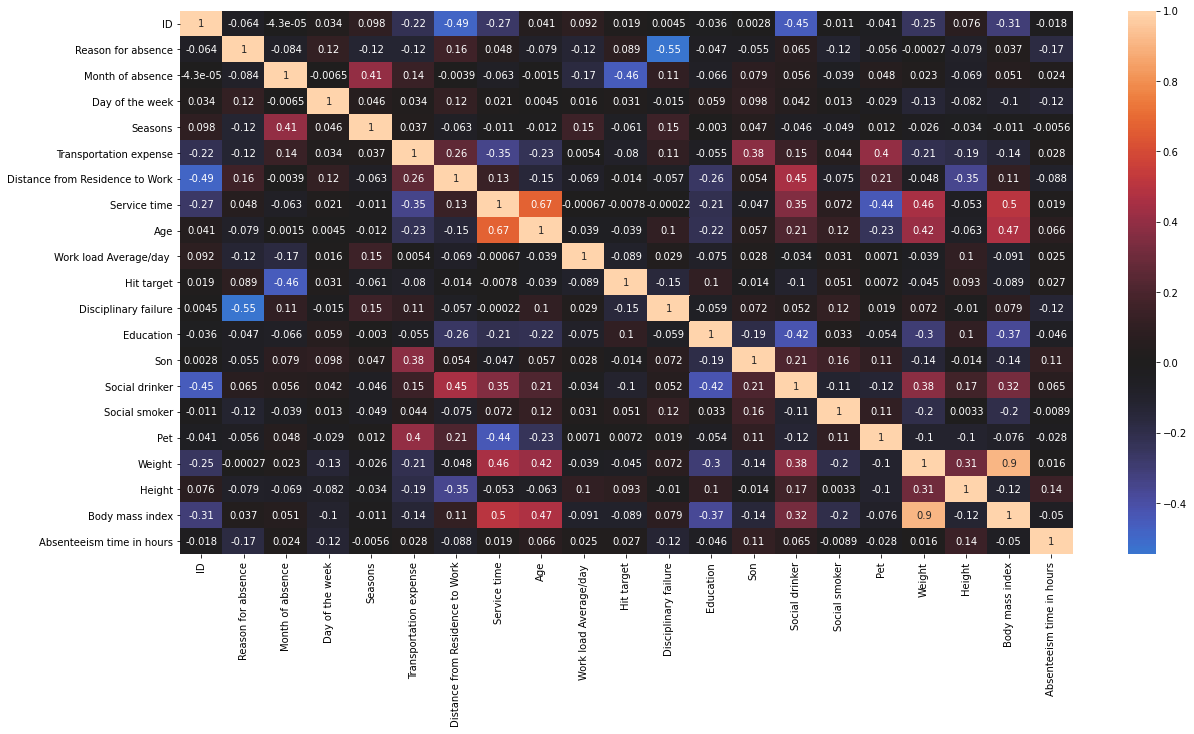

In [5]:
# answer below:
plt.figure(figsize=(20,10))
sns.heatmap(absent.corr(), annot=True, center=0)
plt.show()

Figure out which columns actually contain sneaky categorical variables and turn those into dummy variables.

In [6]:
# answer below:
absent = pd.concat([absent, pd.get_dummies(absent['Son'], drop_first=True, prefix='Son')],  axis=1)
absent = pd.concat([absent, pd.get_dummies(absent['Education'], drop_first=True, prefix='Education')], axis=1)
absent = pd.concat([absent, pd.get_dummies(absent['Pet'], drop_first=True, prefix='Pet')], axis=1)
absent = pd.concat([absent, pd.get_dummies(absent['Day of the week'], drop_first=True, prefix='Day of week')], axis=1)
absent = absent.drop(columns=['ID', 'Son', 'Education', 'Pet', 'Seasons', 'Day of the week', 'Height', 'Weight'])

absent

,Reason for absence,Month of absence,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Social drinker,Social smoker,Body mass index,Absenteeism time in hours,Son_1,Son_2,Son_3,Son_4,Education_2,Education_3,Education_4,Pet_1,Pet_2,Pet_4,Pet_5,Pet_8,Day of week_3,Day of week_4,Day of week_5,Day of week_6
0,26,7,289,36,13,33,239.554,97,0,1,0,30,4,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0
1,0,7,118,13,18,50,239.554,97,1,1,0,31,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,23,7,179,51,18,38,239.554,97,0,1,0,31,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,7,7,279,5,14,39,239.554,97,0,1,1,24,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,23,7,289,36,13,33,239.554,97,0,1,0,30,2,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,14,7,289,36,13,33,264.604,93,0,1,0,30,8,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0
736,11,7,235,11,14,37,264.604,93,0,0,0,29,4,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0
737,0,0,118,14,13,40,271.219,95,0,1,0,34,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
738,0,0,231,35,14,39,271.219,95,0,1,0,35,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0


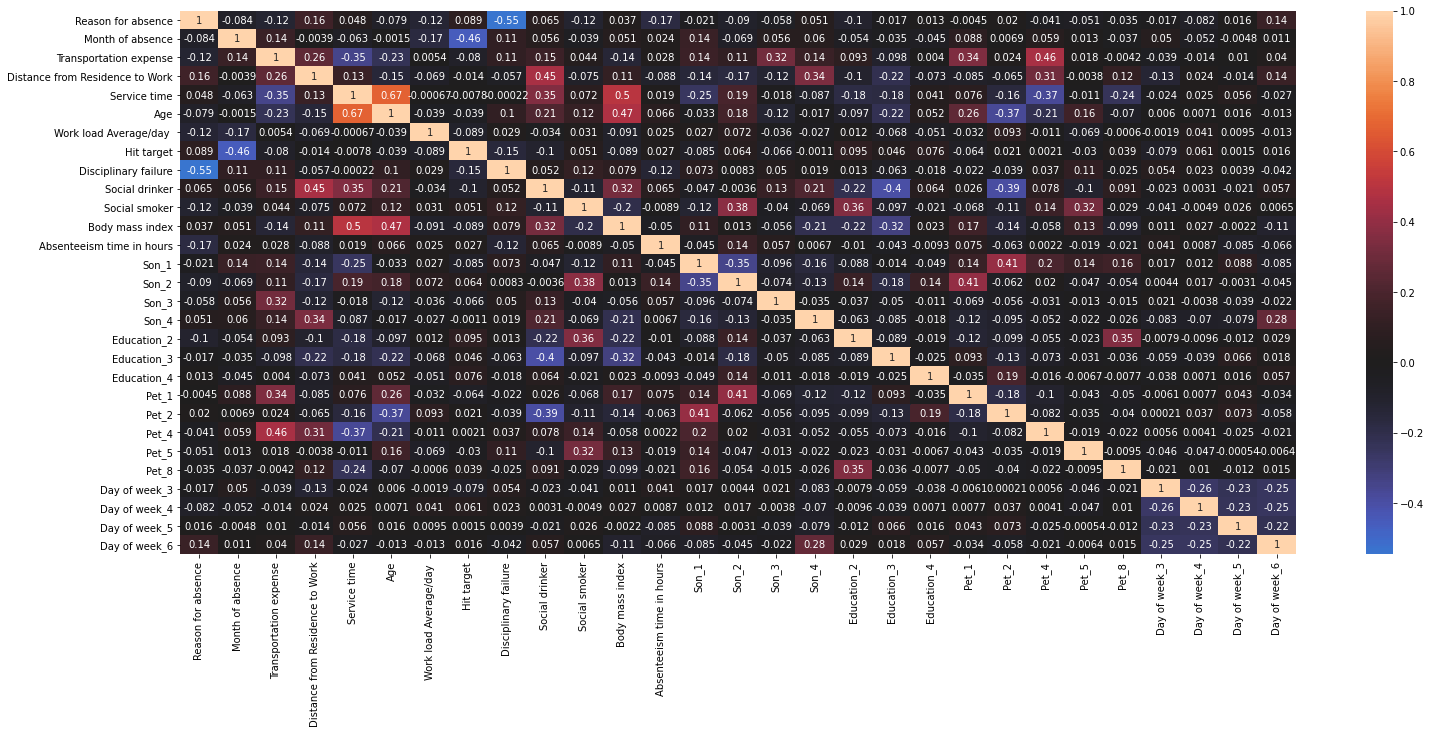

In [7]:
plt.figure(figsize=(25,10))
sns.heatmap(absent.corr(), annot=True, center=0)
plt.show()

Split the data into train and test with test containing 20% of the data, then scale your features.

In [8]:
from sklearn.model_selection import train_test_split
x = absent.drop(columns='Absenteeism time in hours')
y = absent['Absenteeism time in hours']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [9]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

Train a series of KNN regression models with a range of K values. For each K value, use cross validation of the training set and find the average RMSE score. Make a plot of K versus average RMSE. What is the best value of K?

In [10]:
# answer below
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

k_list = np.arange(1, 30, 2)
train_error = []
test_error = []
for i in k_list:
  neigh = KNeighborsRegressor(n_neighbors=i)
  neigh.fit(x_train_scaled, y_train)
  y_pred_train = neigh.predict(x_train_scaled)
  y_pred_test = neigh.predict(x_test_scaled)
  train_error.append(mean_squared_error(y_train, y_pred_train, squared=False))
  test_error.append(mean_squared_error(y_test, y_pred_test, squared=False))

print('K list:', k_list)
print('Train RMSE:', train_error)
print('Test RMSE:',test_error)

K list: [ 1  3  5  7  9 11 13 15 17 19 21 23 25 27 29]
Train RMSE: [1.3469184048000789, 10.527259766824328, 11.587260012384059, 12.510000136680505, 13.037206772429967, 13.211711529256007, 13.360122881768726, 13.488132365702626, 13.59208177376557, 13.66083855249471, 13.71902512666028, 13.765354774975028, 13.805280423358576, 13.834089004797777, 13.816193322124706]
Test RMSE: [12.504863918556715, 9.436487550847364, 8.74389362216145, 9.302553783486003, 8.913755570560875, 8.675821539399928, 8.23250559725068, 8.00757149210678, 8.04769141657683, 7.9921069844603165, 7.872058888745852, 7.750051708649559, 7.680668608283414, 7.660470166611441, 7.6495376103116905]


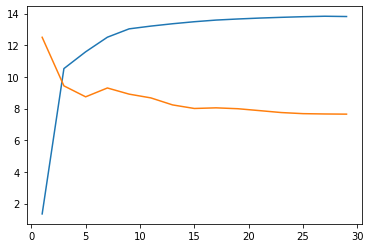

In [11]:
plt.plot(k_list, train_error, label='Train')
plt.plot(k_list, test_error, label='Test')
plt.show()

Using your best K, fit a model to all your training data and show the RMSE for the training and testing sets.

In [12]:
good_neighbor = KNeighborsRegressor(n_neighbors=5).fit(x_train_scaled, y_train)
good_y_pred_train = good_neighbor.predict(x_train_scaled)
good_y_pred_test = good_neighbor.predict(x_test_scaled)
print('Train RMSE:', mean_squared_error(y_train, good_y_pred_train, squared=False))
print('Test RMSE:', mean_squared_error(y_test, good_y_pred_test, squared=False))


Train RMSE: 11.587260012384059
Test RMSE: 8.74389362216145


In [13]:
# answer below

Create a homoscedasticity plot (also called residual plot). How is your model performing? What ideas do you have to improve the model?

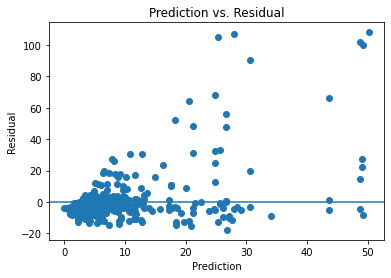

Bartlett stats: BartlettResult(statistic=149.79559078716312, pvalue=1.9214934914380597e-34)
Levene stats: LeveneResult(statistic=3.4337651790517913, pvalue=0.06412540641230242)


In [14]:
# answer below
from scipy.stats import bartlett
from scipy.stats import levene

residual = y_train - y_pred_train
plt.scatter(good_y_pred_train, residual)
plt.xlabel('Prediction')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Prediction vs. Residual')
plt.show()

bart_stats = bartlett(residual, good_y_pred_train)
lev_stats = levene(residual, good_y_pred_train)
print('Bartlett stats:', bart_stats)
print('Levene stats:', lev_stats)

In [15]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.Series([variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])], index=x_train.columns)
vif.sort_values(ascending=False)



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Hit target                         196.334400
Age                                186.147838
Body mass index                     87.533770
Service time                        68.130911
Transportation expense              61.641382
Work load Average/day               46.996659
Distance from Residence to Work     24.462520
Social drinker                      15.318111
Pet_2                               12.360303
Son_1                               11.029097
Reason for absence                   9.260359
Pet_1                                7.869001
Pet_4                                7.211144
Son_2                                5.928297
Month of absence                     4.824955
Education_2                          3.676565
Education_3                          3.232677
Social smoker                        2.369138
Son_4                                2.084778
Pet_5                                2.034673
Pet_8                                2.022231
Day of week_6                     

In [16]:
absent['Work load Average/day ']

0      239.554
1      239.554
2      239.554
3      239.554
4      239.554
        ...   
735    264.604
736    264.604
737    271.219
738    271.219
739    271.219
Name: Work load Average/day , Length: 740, dtype: float64

In [17]:
x_new = absent[['Hit target', 'Age', 'Body mass index', 'Service time', 'Transportation expense', 'Work load Average/day ']]

In [18]:
x_new_train, x_new_test, y_new_train, y_new_test = train_test_split(x_new, y, test_size=0.2)
scaler_new = MinMaxScaler()
x_new_train_scaled = scaler.fit_transform(x_new_train)
x_new_test_scaled = scaler.transform(x_new_test)

In [19]:
k_new_list = np.arange(1, 101, 2)
train_new_error = []
test_new_error = []
for i in k_new_list:
  neigh = KNeighborsRegressor(n_neighbors=i)
  neigh.fit(x_new_train_scaled, y_new_train)
  y_new_pred_train = neigh.predict(x_new_train_scaled)
  y_new_pred_test = neigh.predict(x_new_test_scaled)
  train_new_error.append(mean_squared_error(y_new_train, y_new_pred_train, squared=False))
  test_new_error.append(mean_squared_error(y_new_test, y_new_pred_test, squared=False))

print('K list:', k_list)
print('Train RMSE:', train_new_error)
print('Test RMSE:',test_new_error)

K list: [ 1  3  5  7  9 11 13 15 17 19 21 23 25 27 29]
Train RMSE: [11.68592361821738, 10.891924026957266, 11.83957233066182, 12.150070251454457, 12.347250723694206, 12.417179843274354, 12.418287214768094, 12.522711799399156, 12.602008255935674, 12.623125357000267, 12.665420276443346, 12.674515816098602, 12.69039922273655, 12.749697587977575, 12.805021211476825, 12.808836253708284, 12.80787384938002, 12.826155655196935, 12.867228189078492, 12.921725097114647, 12.939593369002727, 12.959205359023347, 12.92710298784399, 12.921763857017112, 12.918366448346951, 12.88952756490524, 12.906581402716611, 12.914420033698388, 12.911330981086351, 12.920486139755976, 12.941905193433016, 12.950727818462505, 12.967160911864447, 12.986032103052414, 12.98453706843338, 12.985214827734366, 12.994425775343009, 12.9929992468802, 13.001715944473881, 13.008076723868344, 13.022400022530073, 13.016203520738534, 13.027964333359233, 13.038390800530813, 13.02554603829874, 13.022139491391565, 13.030269305971238, 13

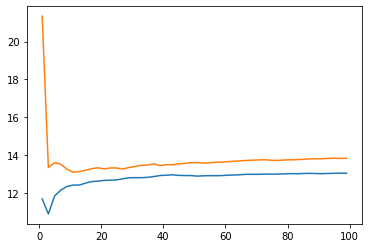

In [20]:
plt.plot(k_new_list, train_new_error, label='Train')
plt.plot(k_new_list, test_new_error, label='Test')
plt.show()

In [23]:
good_new_neighbor = KNeighborsRegressor(n_neighbors=13).fit(x_new_train_scaled, y_new_train)
good_y_new_pred_train = good_new_neighbor.predict(x_new_train_scaled)
good_y_new_pred_test = good_new_neighbor.predict(x_new_test_scaled)
print('Train RMSE:', mean_squared_error(y_new_train, good_y_new_pred_train, squared=False))
print('Test RMSE:', mean_squared_error(y_new_test, good_y_new_pred_test, squared=False))

Train RMSE: 12.418287214768094
Test RMSE: 13.13160725987382


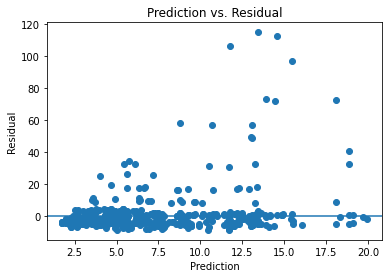

Bartlett stats: BartlettResult(statistic=686.6631955249168, pvalue=2.3764004203612164e-151)
Levene stats: LeveneResult(statistic=17.77583567623519, pvalue=2.674706273705541e-05)


In [22]:
residual_new = y_new_train - y_new_pred_train
plt.scatter(good_y_new_pred_train, residual_new)
plt.xlabel('Prediction')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Prediction vs. Residual')
plt.show()

bart_stats_new = bartlett(residual_new, good_y_new_pred_train)
lev_stats_new = levene(residual_new, good_y_new_pred_train)
print('Bartlett stats:', bart_stats_new)
print('Levene stats:', lev_stats_new)

In [26]:
good_new_neighbor.score(x_new_train_scaled, y_new_train)

0.10705213527080382

In [27]:
good_new_neighbor.score(x_new_test_scaled, y_new_test)

0.12181232922189922